# SI618 Lab 10

### Total score is 100 points

## Overview

This lab consists of an exploration of a well-known UCI data set about wine quality.  The dataset comes from https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

## Wine Dataset

We get you started by loading some libraries as well as the wine quality dataset:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Q1. [10 points] What is the mean, median, standard deviation, and 95% percentile range [2.5%, 97.5%] of all variables in the dataset?

In [3]:
stat = pd.DataFrame(wine.mean(), columns = ["mean"])
stat["median"] = wine.median()
stat["standard deviation"] = wine.std()
stat["95% percentile range [2.5%, 97.5%]"] = [(l,r) for l, r in zip(wine.quantile(0.025), wine.quantile(0.975))]
stat

,mean,median,standard deviation,"95% percentile range [2.5%, 97.5%]"
fixed acidity,8.319637,7.90000,1.741096,"(5.6, 12.5)"
volatile acidity,0.527821,0.52000,0.179060,"(0.24, 0.915)"
citric acid,0.270976,0.26000,0.194801,"(0.0, 0.66)"
residual sugar,2.538806,2.20000,1.409928,"(1.4, 6.3)"
chlorides,0.087467,0.07900,0.047065,"(0.048, 0.205)"
free sulfur dioxide,15.874922,14.00000,10.460157,"(3.0, 40.52499999999998)"
total sulfur dioxide,46.467792,38.00000,32.895324,"(10.0, 131.0)"
density,0.996747,0.99675,0.001887,"(0.992939, 1.0004)"
pH,3.311113,3.31000,0.154386,"(3.0195, 3.6104999999999996)"
sulphates,0.658149,0.62000,0.169507,"(0.44, 1.08)"


### Q2a. [10 points] Create a column based on quality called 'good_wine'. If the quality is greater or equal to the mean, it returns 'yes', otherwise it returns 'no' (Hint: you can use the pd.cut function we learnt earlier. Try to avoid using for loops)

In [4]:
wine['good_wine'] = np.where(wine['quality'] >= np.mean(wine['quality']), 'yes','no')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,no
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,no
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,no
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,yes
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,no


### Q2b. [10 points] Create a column based on pH called 'acidity'. Assign the labels "high" to the first quartile, "moderate" to the second and third quartiles, and "low" to the fourth. (lower pH means more acidic) (Hint: Consider using the pd.qcut function)

In [5]:
bins = [0, 0.25, 0.75, 1]
wine["acidity"] = pd.qcut(wine["pH"], bins, labels=["high", "moderate", "low"])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_wine,acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,no,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,no,high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,no,moderate
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,yes,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,no,low


### Q3. [15 points] Create violin plot  that shows the density (y-axis) for wines with different quality (x-axis), separated according to this new "acidity" column. Please adjust the figure size using sns.set such that the graph could show the detail clearly. Interpret the results and list your findings.

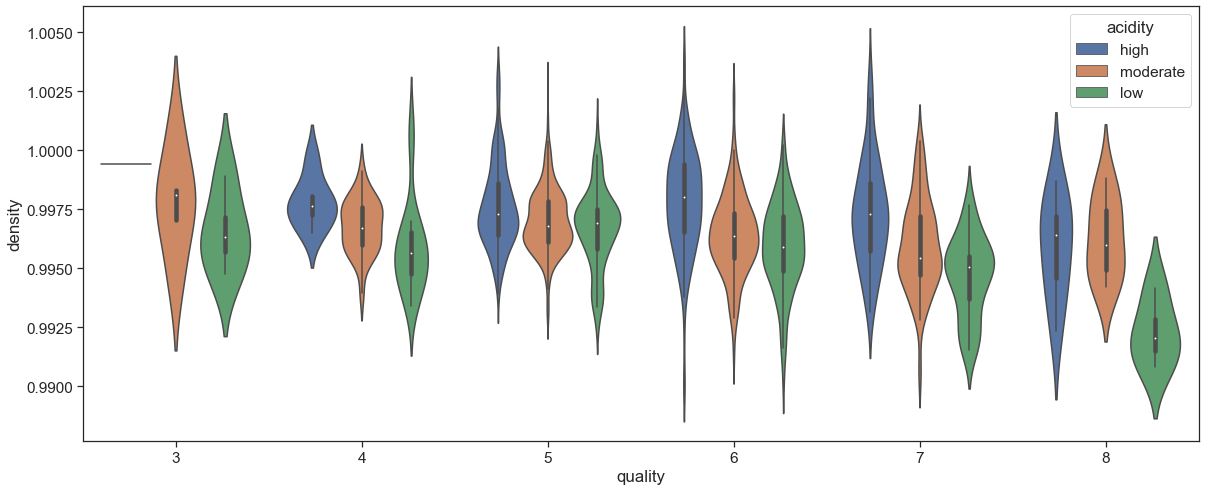

In [6]:
sns.set(style='white')
sns.set(rc = {'figure.figsize':(20,8)})
sns.set(context='notebook', style='ticks', font_scale=1.4)

ax = sns.violinplot(x="quality", y="density", hue="acidity", data=wine)

#### Interpretation

From the plot above, we can find that:
- The higher quality the wine has, the lower density it will be.
- The higher the acidity the wine has, the higher the density it will be.
- The wine with the highest quality and low acidity has the lowest density


### Q4. [15 points] Create a heatmap to visualize the correlation relationship between different columns in the dataset. (Hint: You can compute pairwise correlation of columns with a pandas function)

### Answer the following two questions:
1. List the top 3 variables that are positively correlated with quality, starting with the variable with the highest correlation.
2. List at least one pair of positively correlated and one pair of negatively correlated variables other than quality.

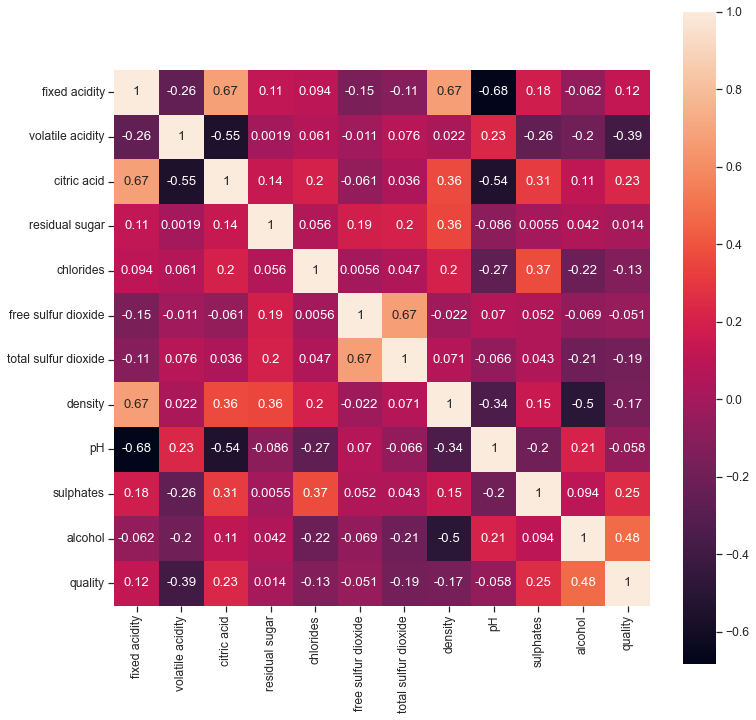

In [7]:
sns.set(rc = {'figure.figsize':(12,12)})
sns.set(context='notebook', style='ticks', font_scale=1.1)

wine_corr = wine.corr()
ax = sns.heatmap(wine_corr, annot=True, square = True)

The top 3 variables that are positively correlated with quality, starting with the variable with the highest correlation.
- `alcohol`, `sulphates`, `citric acid`

Pairs of positively correlated and negatively correlated variables other than quality.
- **positively correlated pairs**: `fixed acidity` and `citric acid`, `fixed acidity` and `density`, `volatile acidity` and `pH`, `citric acid` and `density`, `residual sugar` and `density`, etc.
- **negatively correlated pairs**: `volatile acidity` and `citric acid`, `citric acid` and `pH`, `chlorides` and `pH`, `total sulfur dioxide` and `alcohol`, `density` and `pH`, etc.

### Q5. [15 points] Create a mosaic plot to observe the relationship between **acidity** and **good_wine**. Does it seem like good wines more likely to be associated with a characteristic level of acidity? 

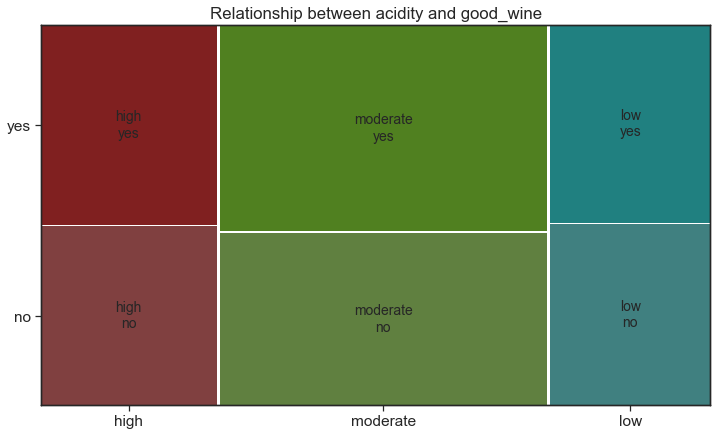

In [8]:
sns.set(rc = {'figure.figsize':(12,7)})
sns.set(context='notebook', style='ticks', font_scale=1.4)
t = mosaic(wine, ['acidity','good_wine'], title='Relationship between acidity and good_wine')
# t[0].set_size_inches(12,8)

#### Interpretation

From the plot above, we can find that:
- good wines do not show any clear association with a characteristic level of acidity.

### Q6. [15 points] Create histogram plots to visualize the distribution of alcohol for good wine and bad wine. Make sure that the 2 histograms are plotted within the same graph and share the x, and y-axis. Interpret the results and list your findings.

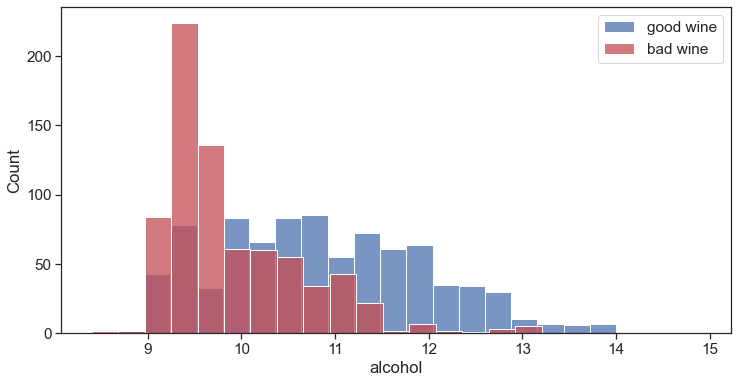

In [9]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.set(context='notebook', style='ticks', font_scale=1.4)
ax1 = sns.histplot(wine[wine["good_wine"] == "yes"]["alcohol"], kde=False, bins = 20, color = 'b', label = "good wine")
ax2 = sns.histplot(wine[wine["good_wine"] == "no"]["alcohol"], kde=False, bins = 23, color= 'r', label = "bad wine")
ax1.legend()

#### Interpretation

From the plot above, we find that:
- The alcohol of bad wine concentrates around 9.5, while the alcohol of good wine concentrates around 11.
- The distribution of alcohol of good wine is more like a normal distribution, while the distribution of alcohol of bad wine is skewed to left
- The wine with a relatively high alcohol is more likely to be good wine.

### Q7. [10 points] Create a cross tabulation of the data between acidity and good_wine.  Is the relationship you observe between acidity and quality statistically significant ($\alpha = 0.05$) ? 

In [10]:
ct = pd.crosstab(wine.good_wine,wine.acidity)
ct

acidity,high,moderate,low
good_wine,,,
no,200,359,185
yes,224,429,202


In [11]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
ex = pd.DataFrame(ex)
ex.index = ['no', 'yes']
ex.columns = ['high', 'moderate', 'low']
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
ex

chi2 =  0.6210867656959888
p-val =  0.7330485219893317
degree of freedom =  2
Expected:


,high,moderate,low
no,197.283302,366.649156,180.067542
yes,226.716698,421.350844,206.932458


Since we have a p-value = 0.733 > $\alpha$ = 0.05, we can not reject the null hypothesis that acidity and quality are indepedent of each other, indicating that there is no enough evidence to conclude that there are some relationship between acidity and quality.

# <font color='red'>Submission Details:</font>
## <font color='red'> Please submit both si618_lab10_uniqname.ipynb and si618_lab10_uniqname.html SEPARATELY on canvas</font>